In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
minimo = df['value'].min()
maximo = df['value'].max()

# O sea, hay que dejar todos los datos que estén sobre el 2.5% del mínimo, y bajo el 2.5% del maximo
valor_minimo = minimo + (minimo * 0.025)
valor_maximo = maximo - (maximo * 0.025)

mask_minimo = df['value'] > (valor_minimo)
mask_maximo = df['value'] < (valor_maximo)

mask_total = (mask_minimo) & (mask_maximo)

df = df[mask_total]
df

,value
date,
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


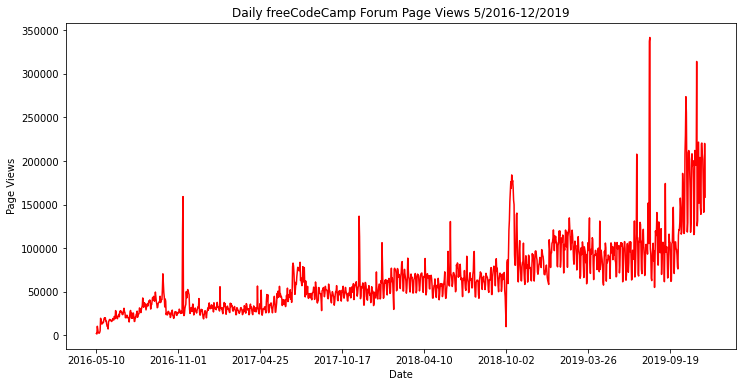

In [4]:
fig, axis = plt.subplots(figsize = (12, 6))

axis.set_xlabel('Date')
axis.set_ylabel('Page Views')
axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axis.plot(df, color = 'red')

ticks_cambiados = axis.get_xticks()[::175] 
axis.set_xticks(ticks_cambiados)


In [15]:
diccionario_total = {}

mes_previo = None
año_previo = None
dias_en_el_mes = 0

for fecha in df.index:

    parse = fecha.split('-')
    año = parse[0]
    mes = parse[1]
    dia = parse[2]

    # Cuando se cambia de año
    if año != año_previo:
        diccionario_total[año] = {f'{mes}': int(df.loc[fecha])}

    # Cuando se cambia de mes
    if mes != mes_previo:
        # Si se cambia de mes, entonces hay que hacer una nueva entrada en el diccionario
        diccionario_total[año][mes] = int(df.loc[fecha])

        # Si existia un mes previo, entonces agregar el promedio de ese mes
        if mes_previo:
            total_visitas = diccionario_total[año_previo][mes_previo]
            promedio = total_visitas / dias_en_el_mes            
            diccionario_total[año_previo][mes_previo] = promedio
            

        dias_en_el_mes = 0

    else:
        diccionario_total[año][mes] += int(df.loc[fecha])
    
    dias_en_el_mes += 1
    mes_previo = mes
    año_previo = año

diccionario_total

El promedio de visitas para el mes 05 es: 58072.22727272727 
El total de visitas para ese mes fue de: 1277589, y los dias del mes fueron 22
El promedio de visitas para el mes 06 es: 93887.56666666667 
El total de visitas para ese mes fue de: 2816627, y los dias del mes fueron 30
El promedio de visitas para el mes 07 es: 112910.2258064516 
El total de visitas para ese mes fue de: 3500217, y los dias del mes fueron 31
El promedio de visitas para el mes 08 es: 152543.12903225806 
El total de visitas para ese mes fue de: 4728837, y los dias del mes fueron 31
El promedio de visitas para el mes 09 es: 201956.46666666667 
El total de visitas para ese mes fue de: 6058694, y los dias del mes fueron 30
El promedio de visitas para el mes 10 es: 130645.93548387097 
El total de visitas para ese mes fue de: 4050024, y los dias del mes fueron 31
El promedio de visitas para el mes 11 es: 198795.7 
El total de visitas para ese mes fue de: 5963871, y los dias del mes fueron 30
El promedio de visitas par

{'2016': {'05': 1277589,
  '06': 2816627,
  '07': 3500217,
  '08': 4728837,
  '09': 6058694,
  '10': 4050024,
  '11': 5963871,
  '12': 4183361},
 '2017': {'01': 1016340,
  '02': 871166,
  '03': 910442,
  '04': 926362,
  '05': 1061573,
  '06': 1307325,
  '07': 2040012,
  '08': 1479086,
  '09': 1421304,
  '10': 1470600,
  '11': 1731047,
  '12': 1501038},
 '2018': {'01': 1815983,
  '02': 1839012,
  '03': 1943507,
  '04': 1870525,
  '05': 1753449,
  '06': 2103510,
  '07': 1971323,
  '08': 1947780,
  '09': 1978252,
  '10': 3490352,
  '11': 2360650,
  '12': 2481472},
 '2019': {'01': 3163752,
  '02': 2967114,
  '03': 2827649,
  '04': 2681053,
  '05': 2834637,
  '06': 2532198,
  '07': 3124938,
  '08': 3657722,
  '09': 2918065,
  '10': 4676744,
  '11': 5430801,
  '12': 521611}}

In [42]:
df.loc['2016-06-11']

value    16098
Name: 2016-06-11, dtype: int64